# Instability under Small Samples
When Estimation Noise Creates Illusion

## 1. Conceptual Motivation

Không phải mọi ảo giác thống kê đều đến từ cấu trúc dữ liệu.

Một số xuất phát hoàn toàn từ nhiễu ước lượng (estimation noise).

Câu hỏi trung tâm:

> Khi population parameter bằng 0,
> liệu sample statistic có thể trông rất lớn không?

Ta sẽ xem xét:

1. Instability của correlation khi true corr = 0
2. Instability của sample mean dưới heavy-tailed distribution
3. Vai trò của sample size

In [1]:
import seaborn as sns

from src import (
    simulate_correlation_instability,
    simulate_mean_instability,
    summarize_sampling_distribution,
    plot_sampling_distribution,
)

sns.set_theme(style="whitegrid")

## 2. Correlation Instability (True ρ = 0)

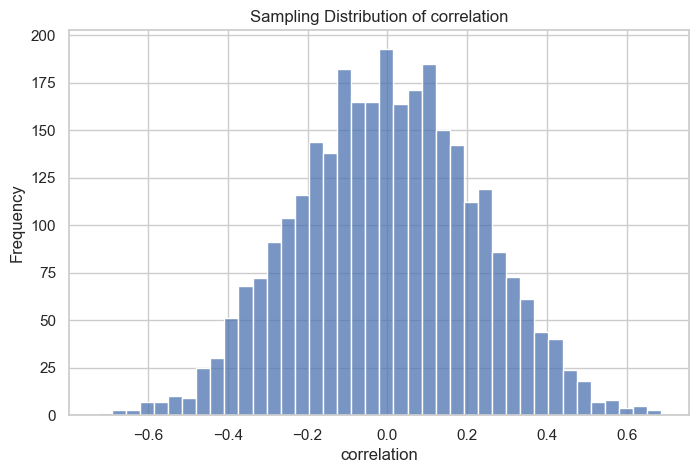

{'mean': -0.0009522682808237869,
 'std': 0.22638628788339568,
 'min': -0.7265313075318663,
 'max': 0.6864401753614582,
 'q_5': -0.37035506211075264,
 'q_95': 0.3729361866440575}

In [2]:
df_corr_small = simulate_correlation_instability(
    n_simulations=3000,
    sample_size=20,
    seed=42
)

plot_sampling_distribution(df_corr_small, "correlation")
summarize_sampling_distribution(df_corr_small, "correlation")

## 3. Interpretation (Sample Size = 20)

Population correlation = 0.

Tuy nhiên, sampling distribution cho thấy:

- Correlation trải rộng từ khoảng −0.7 đến +0.7.
- Nhiều mẫu có |corr| > 0.4.
- Một số mẫu có |corr| > 0.6.

Điều này có nghĩa:

Với sample size = 20,
estimator của correlation có variance rất lớn.

---

### 1. Illusion of Strong Relationship

Một nhà phân tích chỉ quan sát một sample duy nhất
hoàn toàn có thể thấy:

corr ≈ 0.5 hoặc −0.5

và kết luận rằng tồn tại mối quan hệ mạnh,
trong khi true correlation = 0.

Đây là ảo giác thuần túy từ sampling noise.

---

### 2. Vì sao xảy ra?

Correlation estimator có độ lệch chuẩn xấp xỉ:

$$
SE(r) \approx \frac{1}{\sqrt{n - 3}}
$$

Với n = 20:

$$
SE \approx \frac{1}{\sqrt{17}} \approx  0.24
$$

Sai số lớn → phân phối rất rộng.

---

### 3. Không có cấu trúc ẩn

Khác với:

- Simpson (aggregation)
- Spurious correlation (hidden factor)

Ở đây không có cơ chế cấu trúc nào.

Illusion xuất phát hoàn toàn từ:

> Estimator variance.

---

### 4. Ý nghĩa thực tế

- Backtest trên mẫu nhỏ dễ tạo “alpha giả”.
- Nghiên cứu với n nhỏ dễ phát hiện “quan hệ” không tồn tại.
- Data mining dễ sinh false discovery.

Strong sample correlation ≠ True structural relationship.

## 4. Effect of Sample Size

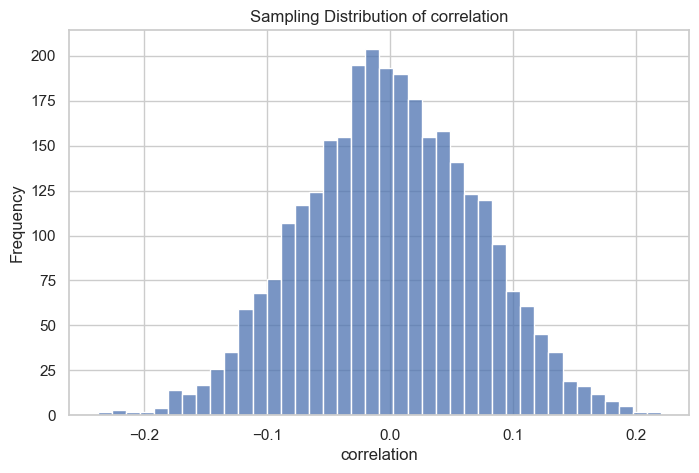

{'mean': -0.0004299031967610826,
 'std': 0.07085655037564492,
 'min': -0.23803769379745499,
 'max': 0.22025803718727732,
 'q_5': -0.11616938159169167,
 'q_95': 0.11619393146321702}

In [3]:
df_corr_large = simulate_correlation_instability(
    n_simulations=3000,
    sample_size=200,
    seed=42
)

plot_sampling_distribution(df_corr_large, "correlation")
summarize_sampling_distribution(df_corr_large, "correlation")

Khi tăng sample size từ 20 lên 200, sampling distribution của correlation thay đổi đáng kể.

### 1. Phân phối thu hẹp mạnh

Với n = 200:

- Correlation chủ yếu nằm trong khoảng −0.2 đến +0.2.
- Giá trị |corr| > 0.3 gần như biến mất.
- Phân phối tập trung chặt quanh 0.

Điều này phản ánh:

Var(r̂) giảm mạnh khi n tăng.

---

### 2. So sánh trực tiếp với n = 20

| Sample Size | Độ rộng phân phối | Khả năng xuất hiện $|corr| > 0.5$ |
|-------------|------------------|---------------------|
| 20 | Rất rộng | Thường xuyên |
| 200 | Hẹp | Gần như không |

Ở n = 20:

- Một sample duy nhất có thể cho corr ≈ 0.6 hoàn toàn ngẫu nhiên.

Ở n = 200:

- Điều đó gần như không thể.

---

### 3. Cơ chế toán học

Độ lệch chuẩn xấp xỉ:

$$
SE(r̂) \approx \frac{1}{\sqrt{n - 3}}
$$

Khi n tăng gấp 10 lần,
SE giảm khoảng √10 ≈ 3.16 lần.

Do đó:

Sampling noise giảm nhanh theo quy mô mẫu.

---

### 4. Kết luận

Instability under small samples không phải do:

- Hidden factor
- Selection bias
- Skewed distribution

Nó xuất phát hoàn toàn từ:

> Estimator variance.

Small sample có thể tạo ra:

> Strong signal without structure.

Large sample làm illusion biến mất.

## 5. Mean Instability under Lognormal Distribution

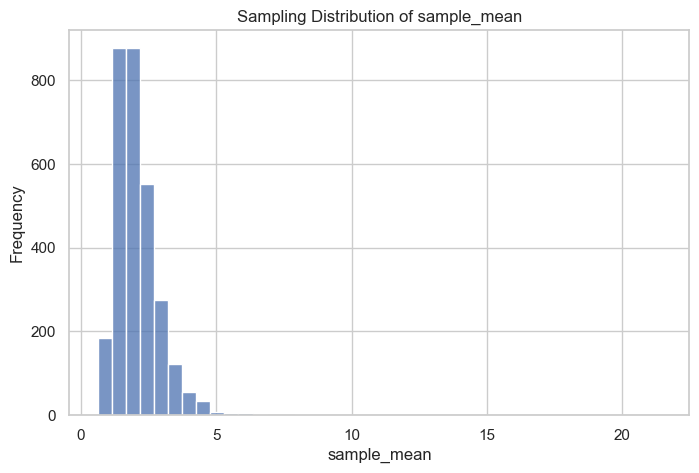

{'mean': 2.069762617743582,
 'std': 0.9122471285212913,
 'min': 0.6186576425870347,
 'max': 21.43772937686297,
 'q_5': 1.098420307593723,
 'q_95': 3.5813154860511136}

In [4]:
df_mean = simulate_mean_instability(
    n_simulations=3000,
    sample_size=20,
    sigma=1.2,
    seed=42
)

plot_sampling_distribution(df_mean, "sample_mean")
summarize_sampling_distribution(df_mean, "sample_mean")

Ta xét lognormal distribution (heavy-tailed), với sample size = 20.

Histogram của sample mean cho thấy:

- Phân phối lệch phải mạnh.
- Phần lớn sample mean nằm trong khoảng thấp (≈ 1–3).
- Một số sample có mean rất lớn do một quan sát cực trị.

---

### 1. Mean bị chi phối bởi extreme values

Với phân phối lognormal:

- Giá trị lớn hiếm gặp nhưng rất lớn.
- Chỉ cần một quan sát extreme trong sample 20 điểm,
  mean có thể tăng đột biến.

Do đó:

Mean estimator không chỉ nhiễu,
mà còn lệch (skewed).

---

### 2. Khác với correlation instability

Correlation instability:

- Đối xứng quanh 0.
- Phân phối gần Gaussian.

Mean instability (heavy tail):

- Bất đối xứng mạnh.
- Tail phải dài.
- Outlier tạo illusion về “high expected value”.

---

### 3. Ý nghĩa thực tế

Trong tài chính:

- Một vài quan sát lợi nhuận cực lớn
  có thể làm expected return trông hấp dẫn.

Trong startup:

- Một vài kỳ lân làm average return của venture capital rất cao,
  dù phần lớn dự án thất bại.

Mean cao ≠ Typical outcome cao.

---

### 4. Cơ chế toán học

Với lognormal:

$$
E[X] = e^{μ + σ²/2}
$$

Khi σ lớn:

- Mean tăng rất nhanh.
- Variance tăng cực mạnh.
- Sampling distribution của mean trở nên rất bất ổn.

Small sample + heavy tail → Illusion of high average performance.

## 6. Structural Interpretation

Instability under small samples không phải là:

- Simpson’s Paradox (distortion do aggregation)
- Selection bias (distortion do filtering)
- Omitted variable (distortion do cấu trúc ẩn)

Nó là một hiện tượng thuần túy của lý thuyết ước lượng.

Cụ thể:

> Sampling distribution của estimator có phương sai hữu hạn,
> và phương sai này giảm theo kích thước mẫu.

Với estimator θ̂:

$$
Var(θ̂) ∝ \frac{1}{\sqrt{n}}
$$

Khi n nhỏ:

- Sampling variance lớn
- Estimator dao động mạnh quanh tham số thật
- Giá trị cực đoan xuất hiện thường xuyên hơn

---

### Heavy tails làm vấn đề nghiêm trọng hơn

Khi phân phối có tail dày:

- Variance của estimator tăng mạnh
- Mean đặc biệt nhạy với outlier
- Sampling distribution trở nên lệch và bất đối xứng

Do đó:

Small sample + heavy tail
→ Illusion of strong signal
→ Illusion of high performance
→ Illusion of predictive power

---

### Kết luận cốt lõi

Strong signal in one small sample
≠
True structural relationship

Nó có thể chỉ là một realization cực trị của sampling noise.

## 7. Connection to Previous Illusions

Ta đã phân tích 5 cơ chế distortion khác nhau:

- Simpson → distortion từ aggregation structure
- Mean vs Median → distortion từ skewness
- Survivorship → distortion từ selection mechanism
- Spurious correlation → distortion từ omitted variable
- Small samples → distortion từ estimation variance

Bốn cơ chế đầu đến từ cấu trúc dữ liệu.

Cơ chế thứ năm đến từ giới hạn của estimator.

Điều này cho thấy:

> Statistical illusion không chỉ là vấn đề “dữ liệu sai”, mà còn là vấn đề “ước lượng trong điều kiện hữu hạn”.

Nói cách khác:

> Even when the data-generating process is perfectly known, finite samples alone can create misleading conclusions.